# H7N9 intrahost diversity is subject to purifying selection 

**Date**: 2019-10-07, modified 2019-01-17  
**Author**: Katarina Braun 

## Overview
- The purpose of this script is to take raw diveristy (π) data, generated from the SNPGenie program, and generate plots to evaluate and compare genome-wise diveristy (π and Shannon Entropy, H), genewise πS (synonymous diveristy) and πN(nonsynonymous diversity) before and after transmission, as well as rolling πS and πN before and after transmission. 

- will plot π, pulled from `population_summary.txt` files -- fifth column 
- plot each gene within each ferret first 
    
### Note about HA numbering: 
For H7N9, I used H7 numbering. This numbering scheme matches the numbering scheme on Nextstrain (https://nextstrain.org/).  
For H1N1pdm, I use H1 numbering. Again, this numbering scheme matches the numbering scheme on Nextstrain. For clarity, I start counting amino acids at nucleotide #51, AA #18 (D). 

**Colors**: (hex codes) 
1. **GD3 and recombinant viruses**: #264653
2. **Anhui**: #2A9D8F
3. **CA04**: #F4A261

## Input: 

- 6A: `H7N9-evolution-in-mammals/data_derived/diversity/population_summary.txt` files -- fifth column  
- 6B:
- 6C: 

## Output: 

***

## for ease of use, here is a table summarizing the transmission pair available data 

### Index ferrets 

| Ferret ID | Virus | Day 1 | Day 3 | Day 5 | Day 7 |
| - | - | - | - | - | - |
|3|Guangdong/17SF003|x|x|x|x|
|9|R294-Guangdong|x|x|x|x|
|11|R294-Guangdong|x|x|
|15|R294-Guangdong|x|x|x|x|
|17|K294-Guangdong|x|x|x|x|
|21|K294-Guangdong|x|x|x|
|23|K294-Guangdong|x|x|x|x|
|27|Anhui1|x|x|x|x|
|35|CA04|x|x|x|

### Contact ferrets 

| Ferret ID | Virus | Day 3 | Day 5 | Day 7 | Day 9 | Day 11 | Day 13 | Day 15 |
| - | - | - | - | - | - | -|-|-|
|4|Guangdong/17SF003|-|x|x|x|x|
|10|R294-Guangdong|x|x|x|x|
|12|R294-Guangdong|x|x|
|16|R294-Guangdong|x|x|x|
|18|K294-Guangdong|-|-|-|-|x|x|x|
|22|K294-Guangdong|x|x|x|x|
|24|K294-Guangdong|
|28|Anhui1|x|x|x|
|36|CA04|x|x|

### Ferret pairs, timepoints closest to time of transmission 
| Ferret pair ID | Index ID | Contact ID | Virus | transmission timepoint #1 (index) | transmission timepoint #2 (contact) | 
| - | - | - | - | - | - | 
|1|3|4|Guangdong/17SF003|DPI 3| DPI 5|
|2|9|10|R294-Guangong|DPI 1| DPI 3|
|3|11|12|R294-Guangong|DPI 1| DPI 3|
|4|15|16|R294-Guangong|DPI 1| DPI 3|
|5|17|18|K294-Guangong|DPI 7| DPI 11|
|6|21|22|K294-Guangong|DPI 1| DPI 3|
|7|27|28|Anhui1|DPI 1| DPI 3|
|8|35|36|CA04|DPI 1| DPI 3|

### import modules and dependencies

In [669]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.pyplot as plt
from functools import reduce
import matplotlib as mpl
from matplotlib import gridspec
import itertools
import pysam
import matplotlib.patches as mpatches
import random 
from pylab import *
from matplotlib.font_manager import FontProperties 
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib import gridspec

## Figure 6A, π values 

In [670]:
def load_π(ferret):
    PB2 = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret + '_PB2.txt', header=0, sep='\t', low_memory=False)
    PB2 = PB2.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'piN', 'piS', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    PB2 = PB2.rename(columns={'pi':'PB2'})
    PB1 = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret + '_PB1.txt', header=0, sep='\t', low_memory=False)
    PB1 = PB1.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'piN', 'piS', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    PB1 = PB1.rename(columns={'pi':'PB1'})
    PA = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret + '_PA.txt', header=0, sep='\t', low_memory=False)
    PA = PA.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'piN', 'piS', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    PA = PA.rename(columns={'pi':'PA'})
    HA = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret + '_HA.txt', header=0, sep='\t', low_memory=False)
    HA = HA.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'piN', 'piS', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    HA = HA.rename(columns={'pi':'HA'})
    NP = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret + '_NP.txt', header=0, sep='\t', low_memory=False)
    NP = NP.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'piN', 'piS', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    NP = NP.rename(columns={'pi':'NP'})
    NA = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret + '_NA.txt', header=0, sep='\t', low_memory=False)
    NA = NA.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'piN', 'piS', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    NA = NA.rename(columns={'pi':'NA'})
    MP = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret + '_MP.txt', header=0, sep='\t', low_memory=False)
    MP = MP.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'piN', 'piS', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    MP = MP.rename(columns={'pi':'MP'})
    NS = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret + '_NS.txt', header=0, sep='\t', low_memory=False)
    NS = NS.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'piN', 'piS', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    NS = NS.rename(columns={'pi':'NS'})
    pi = pd.concat([PB2, PB1, PA, HA, NP, NA, MP, NS], axis=1)
    pi = pi.T
    pi.columns = ['π']
    pi.to_csv('../data_derived/diversity/π/' + ferret + '_π.txt', sep='\t')
    return(pi)

In [671]:
# run the load_π function for all ferrets
GD3_ferret3_day3 = load_π('GD3_ferret3_day3')
GD3_ferret3_day3 = GD3_ferret3_day3.rename(columns={'π': 'π_index'})
GD3_ferret4_day5 = load_π('GD3_ferret4_day5')
GD3_ferret4_day5 = GD3_ferret4_day5.rename(columns={'π': 'π_contact'})

Anhui_ferret27_day1 = load_π('Anhui_ferret27_day1')
Anhui_ferret27_day1 = Anhui_ferret27_day1.rename(columns={'π': 'π_index'})
Anhui_ferret28_day3 = load_π('Anhui_ferret28_day3')
Anhui_ferret28_day3 = Anhui_ferret28_day3.rename(columns={'π': 'π_contact'})

CA04_ferret35_day1 = load_π('CA04_ferret35_day1')
CA04_ferret35_day1 = CA04_ferret35_day1.rename(columns={'π': 'π_index'})
CA04_ferret36_day3 = load_π('CA04_ferret36_day3')
CA04_ferret36_day3 = CA04_ferret36_day3.rename(columns={'π': 'π_contact'})

In [672]:
# merge index and contact dataframes 
pair1 = GD3_ferret3_day3.join(GD3_ferret4_day5, how='outer')
pair7 = Anhui_ferret27_day1.join(Anhui_ferret28_day3, how='outer')
pair8 = CA04_ferret35_day1.join(CA04_ferret36_day3, how='outer')

## Figure 6A, Shannon H index 

## genewise-shannon-index(H)

Date: 2019-10-09, edited 2020-01-19

- I am going to use SNP freq = allele freq to determine genewise Shannon entropy index as an alternative to nucleotide diversity 
- Sum (nuc freq * (ln(nuc freq))) for each base at each position and then across sites
- I will do this across each gene first and then will do 150bp (50 codon) sliding window analyses to mirror π analyses 
- I'll use the VCFs in `H7N9-evolution-in-mammals/data_derived/SNV/*` to do this 
- I will start within a single timepoint and will look at diversity over time 

- display with simple barplots (like the genewise π plots) for now 

- note: `np.log` is equivalent to the natural log

In [673]:
def shannon_H(ferret, PB2_len, PB1_len, PA_len, HA_len, NP_len, NA_len, MP_len, NS_len): # ferret is a string with ferret ID and timepoint, gene lengths are all integers
    DF = pd.read_csv(filepath_or_buffer='../data_derived/SNV//cleaned/' + ferret + '-cleaned.csv', header=0, sep='\t', low_memory=False)
    DF = DF.drop(['Unnamed: 0', 'SNP', '% of population'], axis=1)
    DF = DF.replace(np.nan, 'NA', regex=True)
    PB2 = DF.loc[DF['gene'].str.contains("PB2")]
    PB1 = DF.loc[DF['gene'].str.contains("PB1")]
    PA = DF.loc[DF['gene'].str.contains("PA")]
    HA = DF.loc[DF['gene'].str.contains("HA")]
    NP = DF.loc[DF['gene'].str.contains("NP")]
    NA = DF.loc[DF['gene'].str.contains("NA")]
    M1 = DF.loc[DF['gene'].str.contains("M1")]
    M2 = DF.loc[DF['gene'].str.contains("M2")]
    NS1 = DF.loc[DF['gene'].str.contains("NS1")]
    NEP = DF.loc[DF['gene'].str.contains("NEP")]
    if PB2.empty: 
        print("PB2 is empty")
    elif any(PB2['POS'].duplicated()):
        print("STOP, there is more than 1 nucleotide SNP at the same position and this script will not take that into account")
    else:
        PB2['FREQ2'] = 1 - PB2['FREQ']
        PB2['H1'] = PB2['FREQ'] * np.log(PB2['FREQ']) * -1 
        PB2['H2'] = PB2['FREQ2'] * np.log(PB2['FREQ2']) * -1
        PB2['shannon'] = PB2['H1'] + PB2['H2']
    if PB1.empty: 
        print("PB1 is empty")
    elif any(PB1['POS'].duplicated()):
        print("STOP, there is more than 1 nucleotide SNP at the same position and this script will not take that into account")
    else:
        PB1['FREQ2'] = 1 - PB1['FREQ']
        PB1['H1'] = PB1['FREQ'] * np.log(PB1['FREQ']) * -1 
        PB1['H2'] = PB1['FREQ2'] * np.log(PB1['FREQ2']) * -1
        PB1['shannon'] = PB1['H1'] + PB1['H2']
    if PA.empty: 
        print("PA is empty")
    elif any(PA['POS'].duplicated()):
        print("STOP, there is more than 1 nucleotide SNP at the same position and this script will not take that into account")
    else:
        PA['FREQ2'] = 1 - PA['FREQ']
        PA['H1'] = PA['FREQ'] * np.log(PA['FREQ']) * -1 
        PA['H2'] = PA['FREQ2'] * np.log(PA['FREQ2']) * -1
        PA['shannon'] = PA['H1'] + PA['H2']
    if HA.empty: 
        print("HA is empty")
    elif any(HA['POS'].duplicated()):
        print("STOP, there is more than 1 nucleotide SNP at the same position and this script will not take that into account")
    else:
        HA['FREQ2'] = 1 - HA['FREQ']
        HA['H1'] = HA['FREQ'] * np.log(HA['FREQ']) * -1 
        HA['H2'] = HA['FREQ2'] * np.log(HA['FREQ2']) * -1
        HA['shannon'] = HA['H1'] + HA['H2']
    if NP.empty: 
        print("NP is empty")
    elif any(NP['POS'].duplicated()):
        print("STOP, there is more than 1 nucleotide SNP at the same position and this script will not take that into account")
    else:
        NP['FREQ2'] = 1 - NP['FREQ']
        NP['H1'] = NP['FREQ'] * np.log(NP['FREQ']) * -1 
        NP['H2'] = NP['FREQ2'] * np.log(NP['FREQ2']) * -1
        NP['shannon'] = NP['H1'] + NP['H2']
    if NA.empty: 
        print("NA is empty")
    elif any(NA['POS'].duplicated()):
        print("STOP, there is more than 1 nucleotide SNP at the same position and this script will not take that into account")
    else:
        NA['FREQ2'] = 1 - NA['FREQ']
        NA['H1'] = NA['FREQ'] * np.log(NA['FREQ']) * -1 
        NA['H2'] = NA['FREQ2'] * np.log(NA['FREQ2']) * -1
        NA['shannon'] = NA['H1'] + NA['H2']
    if M1.empty: 
        print("M1 is empty")
    elif any(M1['POS'].duplicated()):
        print("STOP, there is more than 1 nucleotide SNP at the same position and this script will not take that into account")
    else:
        M1['FREQ2'] = 1 - M1['FREQ']
        M1['H1'] = M1['FREQ'] * np.log(M1['FREQ']) * -1 
        M1['H2'] = M1['FREQ2'] * np.log(M1['FREQ2']) * -1
        M1['shannon'] = M1['H1'] + M1['H2']
    if M2.empty: 
        print("M2 is empty")
    elif any(M2['POS'].duplicated()):
        print("STOP, there is more than 1 nucleotide SNP at the same position and this script will not take that into account")
    else:
        M2['FREQ2'] = 1 - M2['FREQ']
        M2['H1'] = M2['FREQ'] * np.log(M2['FREQ']) * -1 
        M2['H2'] = M2['FREQ2'] * np.log(M2['FREQ2']) * -1
        M2['shannon'] = M2['H1'] + M2['H2']
    if NS1.empty: 
        print("NS1 is empty")
    elif any(NS1['POS'].duplicated()):
        print("STOP, there is more than 1 nucleotide SNP at the same position and this script will not take that into account")
    else:
        NS1['FREQ2'] = 1 - NS1['FREQ']
        NS1['H1'] = NS1['FREQ'] * np.log(NS1['FREQ']) * -1 
        NS1['H2'] = NS1['FREQ2'] * np.log(NS1['FREQ2']) * -1
        NS1['shannon'] = NS1['H1'] + NS1['H2']
    if NEP.empty: 
        print("NEP is empty")
    elif any(NEP['POS'].duplicated()):
        print("STOP, there is more than 1 nucleotide SNP at the same position and this script will not take that into account")
    else:
        NEP['FREQ2'] = 1 - NEP['FREQ']
        NEP['H1'] = NEP['FREQ'] * np.log(NEP['FREQ']) * -1 
        NEP['H2'] = NEP['FREQ2'] * np.log(NEP['FREQ2']) * -1
        NEP['shannon'] = NEP['H1'] + NEP['H2']
    if not M1.empty and not M2.empty: # merge M1 and M2 and get rid of any duplicates 
        MP = pd.concat([M1, M2])
        MP.drop_duplicates(['POS'])
        MP = MP[['gene', 'POS', 'REF', 'ALT', 'FREQ', 'FREQ2', 'H1', 'H2', 'shannon']]
    elif M1.empty and not M2.empty: 
        MP = M2
    elif M2.empty and not M1.empty: 
        MP = M1
    else: 
        MP = pd.DataFrame(0, index=np.arange(1), columns=np.arange(9))
        MP = MP.rename(columns={0:'gene', 1:'POS', 2:'REF', 3:'ALT', 4:'FREQ', 5:'FREQ2', 6:'H1', 7:'H2', 8:'shannon'})
        print('made an empty MP dataframe')
    if not NS1.empty and not NEP.empty: 
        NS = pd.concat([NS1, NEP])
        NS.drop_duplicates(['POS'])
        NS = NS[['gene', 'POS', 'REF', 'ALT', 'FREQ', 'FREQ2', 'H1', 'H2', 'shannon']]
    elif NS1.empty and not NEP.empty: 
        NS = NEP
    elif NEP.empty and not NS1.empty: 
        NS = NS1
    else: 
        NS = pd.DataFrame(0, index=np.arange(1), columns=np.arange(9))
        NS = NS.rename(columns={0:'gene', 1:'POS', 2:'REF', 3:'ALT', 4:'FREQ', 5:'FREQ2', 6:'H1', 7:'H2', 8:'shannon'})
        print('made an empty NS dataframe')
        
    # the code below will modify the above dataframes 
    if PB2.empty: 
        print("PB2 is empty")
    else:
        #create an empty dataframe for each gene segment 
        PB2v2 = pd.DataFrame(0, index=np.arange(PB2_len), columns=np.arange(2))
        PB2v2 = PB2v2.rename(columns={0:'gene', 1:'POS'})
        PB2v2['gene'] = 'PB2'
        PB2v2['POS'] = np.arange(len(PB2v2))+1

        #fill this complete gene dataframe with variable sites across the gene segment 
        PB2final = PB2v2.merge(PB2, how='left', on=['POS'])
#         PB2final.drop(PB2final.columns[[2,3,4,5,6,7]])

        PB2final = PB2final.drop('gene_y', axis=1)
        PB2final = PB2final.drop('REF', axis=1)
        PB2final = PB2final.drop('ALT', axis=1)
        PB2final = PB2final.drop('FREQ', axis=1)
        PB2final = PB2final.drop('FREQ2', axis=1)
        PB2final = PB2final.drop('H1', axis=1)
        PB2final = PB2final.drop('H2', axis=1)
        PB2final = PB2final.rename(columns={'gene_x':'gene'})
        PB2final = PB2final.replace(np.nan, 0, regex=True)

        #caculate shannon entropy per gene segment 
        PB2_shannon = PB2final['shannon'].sum() / PB2_len
#         print('H index, PB2 = ', PB2_shannon)
        
    if PB1.empty: 
        print("PB1 is empty")
    else:
        #create an empty dataframe for each gene segment 
        PB1v2 = pd.DataFrame(0, index=np.arange(PB1_len), columns=np.arange(2))
        PB1v2 = PB1v2.rename(columns={0:'gene', 1:'POS'})
        PB1v2['gene'] = 'PB1'
        PB1v2['POS'] = np.arange(len(PB1v2))+1

        #fill this complete gene dataframe with variable sites across the gene segment 
        PB1final = PB1v2.merge(PB1, how='left', on=['POS'])
        # PB1final.drop(PB1final.columns[[2,3,4,5,6,7]])

        PB1final = PB1final.drop('gene_y', axis=1)
        PB1final = PB1final.drop('REF', axis=1)
        PB1final = PB1final.drop('ALT', axis=1)
        PB1final = PB1final.drop('FREQ', axis=1)
        PB1final = PB1final.drop('FREQ2', axis=1)
        PB1final = PB1final.drop('H1', axis=1)
        PB1final = PB1final.drop('H2', axis=1)
        PB1final = PB1final.rename(columns={'gene_x':'gene'})
        PB1final = PB1final.replace(np.nan, 0, regex=True)

        #caculate shannon entropy per gene segment 
        PB1_shannon = PB1final['shannon'].sum() / PB1_len
#         print('H index, PB1 = ', PB1_shannon)
        
    if PA.empty: 
        print("PA is empty")
    else:
        #create an empty dataframe for each gene segment 
        PAv2 = pd.DataFrame(0, index=np.arange(PA_len), columns=np.arange(2))
        PAv2 = PAv2.rename(columns={0:'gene', 1:'POS'})
        PAv2['gene'] = 'PA'
        PAv2['POS'] = np.arange(len(PAv2))+1

        #fill this complete gene dataframe with variable sites across the gene segment 
        PAfinal = PAv2.merge(PA, how='left', on=['POS'])
        # PAfinal.drop(PAfinal.columns[[2,3,4,5,6,7]])

        PAfinal = PAfinal.drop('gene_y', axis=1)
        PAfinal = PAfinal.drop('REF', axis=1)
        PAfinal = PAfinal.drop('ALT', axis=1)
        PAfinal = PAfinal.drop('FREQ', axis=1)
        PAfinal = PAfinal.drop('FREQ2', axis=1)
        PAfinal = PAfinal.drop('H1', axis=1)
        PAfinal = PAfinal.drop('H2', axis=1)
        PAfinal = PAfinal.rename(columns={'gene_x':'gene'})
        PAfinal = PAfinal.replace(np.nan, 0, regex=True)

        #caculate shannon entropy per gene segment 
        PA_shannon = PAfinal['shannon'].sum() / PA_len
#         print('H index, PA = ', PA_shannon)
        
    if HA.empty: 
        print("HA is empty")
    else:
        #create an empty dataframe for each gene segment 
        HAv2 = pd.DataFrame(0, index=np.arange(HA_len), columns=np.arange(2))
        HAv2 = HAv2.rename(columns={0:'gene', 1:'POS'})
        HAv2['gene'] = 'HA'
        HAv2['POS'] = np.arange(len(HAv2))+1

        #fill this complete gene dataframe with variable sites across the gene segment 
        HAfinal = HAv2.merge(HA, how='left', on=['POS'])
        # HAfinal.drop(HAfinal.columns[[2,3,4,5,6,7]])

        HAfinal = HAfinal.drop('gene_y', axis=1)
        HAfinal = HAfinal.drop('REF', axis=1)
        HAfinal = HAfinal.drop('ALT', axis=1)
        HAfinal = HAfinal.drop('FREQ', axis=1)
        HAfinal = HAfinal.drop('FREQ2', axis=1)
        HAfinal = HAfinal.drop('H1', axis=1)
        HAfinal = HAfinal.drop('H2', axis=1)
        HAfinal = HAfinal.rename(columns={'gene_x':'gene'})
        HAfinal = HAfinal.replace(np.nan, 0, regex=True)

        #caculate shannon entropy per gene segment 
        HA_shannon = HAfinal['shannon'].sum() / HA_len
#         print('H index, HA = ', HA_shannon)
        
    if NP.empty: 
        print("NP is empty")
    else:
        #create an empty dataframe for each gene segment 
        NPv2 = pd.DataFrame(0, index=np.arange(NP_len), columns=np.arange(2))
        NPv2 = NPv2.rename(columns={0:'gene', 1:'POS'})
        NPv2['gene'] = 'NP'
        NPv2['POS'] = np.arange(len(NPv2))+1

        #fill this complete gene dataframe with variable sites across the gene segment 
        NPfinal = NPv2.merge(NP, how='left', on=['POS'])
        # NPfinal.drop(NPfinal.columns[[2,3,4,5,6,7]])

        NPfinal = NPfinal.drop('gene_y', axis=1)
        NPfinal = NPfinal.drop('REF', axis=1)
        NPfinal = NPfinal.drop('ALT', axis=1)
        NPfinal = NPfinal.drop('FREQ', axis=1)
        NPfinal = NPfinal.drop('FREQ2', axis=1)
        NPfinal = NPfinal.drop('H1', axis=1)
        NPfinal = NPfinal.drop('H2', axis=1)
        NPfinal = NPfinal.rename(columns={'gene_x':'gene'})
        NPfinal = NPfinal.replace(np.nan, 0, regex=True)

        #caculate shannon entropy per gene segment 
        NP_shannon = NPfinal['shannon'].sum() / NP_len
#         print('H index, NP = ', NP_shannon)
        
    if NA.empty: 
        print("NA is empty")
    else:
        #create an empty dataframe for each gene segment 
        N9v2 = pd.DataFrame(0, index=np.arange(NA_len), columns=np.arange(2))
        N9v2 = N9v2.rename(columns={0:'gene', 1:'POS'})
        N9v2['gene'] = 'NA'
        N9v2['POS'] = np.arange(len(N9v2))+1

        #fill this complete gene dataframe with variable sites across the gene segment 
        NAfinal = N9v2.merge(NA, how='left', on=['POS'])
        # NAfinal.drop(NAfinal.columns[[2,3,4,5,6,7]])

        NAfinal = NAfinal.drop('gene_y', axis=1)
        NAfinal = NAfinal.drop('REF', axis=1)
        NAfinal = NAfinal.drop('ALT', axis=1)
        NAfinal = NAfinal.drop('FREQ', axis=1)
        NAfinal = NAfinal.drop('FREQ2', axis=1)
        NAfinal = NAfinal.drop('H1', axis=1)
        NAfinal = NAfinal.drop('H2', axis=1)
        NAfinal = NAfinal.rename(columns={'gene_x':'gene'})
        NAfinal = NAfinal.replace(np.nan, 0, regex=True)

        #caculate shannon entropy per gene segment 
        NA_shannon = NAfinal['shannon'].sum() / NA_len
#         print('H index, NA = ', NA_shannon)
        
    if MP.empty: 
        print("MP is empty")
    else:
        #create an empty dataframe for each gene segment 
        MPv2 = pd.DataFrame(0, index=np.arange(MP_len), columns=np.arange(2))
        MPv2 = MPv2.rename(columns={0:'gene', 1:'POS'})
        MPv2['gene'] = 'MP'
        MPv2['POS'] = np.arange(len(MPv2))+1

        #fill this complete gene dataframe with variable sites across the gene segment 
        MPfinal = MPv2.merge(MP, how='left', on=['POS'])
        # MPfinal.drop(MPfinal.columns[[2,3,4,5,6,7]])

        MPfinal = MPfinal.drop('gene_y', axis=1)
        MPfinal = MPfinal.drop('REF', axis=1)
        MPfinal = MPfinal.drop('ALT', axis=1)
        MPfinal = MPfinal.drop('FREQ', axis=1)
        MPfinal = MPfinal.drop('FREQ2', axis=1)
        MPfinal = MPfinal.drop('H1', axis=1)
        MPfinal = MPfinal.drop('H2', axis=1)
        MPfinal = MPfinal.rename(columns={'gene_x':'gene'})
        MPfinal = MPfinal.replace(np.nan, 0, regex=True)

        #caculate shannon entropy per gene segment 
        MP_shannon = MPfinal['shannon'].sum() / MP_len
#         print('H index, MP = ', MP_shannon)
        
    if NS.empty: 
        print("NS is empty")
    else:
        #create an empty dataframe for each gene segment 
        NSv2 = pd.DataFrame(0, index=np.arange(NS_len), columns=np.arange(2))
        NSv2 = NSv2.rename(columns={0:'gene', 1:'POS'})
        NSv2['gene'] = 'NS'
        NSv2['POS'] = np.arange(len(NSv2))+1

        #fill this complete gene dataframe with variable sites across the gene segment 
        NSfinal = NSv2.merge(NS, how='left', on=['POS'])
        # NSfinal.drop(NSfinal.columns[[2,3,4,5,6,7]])

        NSfinal = NSfinal.drop('gene_y', axis=1)
        NSfinal = NSfinal.drop('REF', axis=1)
        NSfinal = NSfinal.drop('ALT', axis=1)
        NSfinal = NSfinal.drop('FREQ', axis=1)
        NSfinal = NSfinal.drop('FREQ2', axis=1)
        NSfinal = NSfinal.drop('H1', axis=1)
        NSfinal = NSfinal.drop('H2', axis=1)
        NSfinal = NSfinal.rename(columns={'gene_x':'gene'})
        NSfinal = NSfinal.replace(np.nan, 0, regex=True)

        #caculate shannon entropy per gene segment 
        NS_shannon = NSfinal['shannon'].sum() / NS_len
#         print('H index, NS = ', NS_shannon)
        
    genes = pd.DataFrame(0, index=np.arange(8), columns=np.arange(2))
    genes = genes.rename(columns={0:'gene', 1:'shannon index'})
    genes.loc[0,'gene'] = 'PB2'
    genes.loc[1,'gene'] = 'PB1'
    genes.loc[2,'gene'] = 'PA'
    genes.loc[3,'gene'] = 'HA'
    genes.loc[4,'gene'] = 'NP'
    genes.loc[5,'gene'] = 'NA'
    genes.loc[6,'gene'] = 'MP'
    genes.loc[7,'gene'] = 'NS'

    if PB2.empty:
        genes.loc[0,'shannon index'] = 0
    else:
        genes.loc[0,'shannon index'] = PB2_shannon

    if PB1.empty:
        genes.loc[1,'shannon index'] = 0
    else:
        genes.loc[1,'shannon index'] = PB1_shannon

    if PA.empty:
        genes.loc[2,'shannon index'] = 0
    else:
        genes.loc[2,'shannon index'] = PA_shannon

    if HA.empty:
        genes.loc[3,'shannon index'] = 0
    else:
        genes.loc[3,'shannon index'] = HA_shannon

    if NP.empty:
        genes.loc[4,'shannon index'] = 0
    else:
        genes.loc[4,'shannon index'] = NP_shannon

    if NA.empty:
        genes.loc[5,'shannon index'] = 0
    else:
        genes.loc[5,'shannon index'] = NA_shannon

    if MP.empty:
        genes.loc[6,'shannon index'] = 0
    else:
        genes.loc[6,'shannon index'] = MP_shannon

    if NS.empty:
        genes.loc[7,'shannon index'] = 0
    else:
        genes.loc[7,'shannon index'] = NS_shannon

    genes.to_csv('../data_derived/diversity/shannon_entropy/' + ferret + '_genewise-shannon-entropy.csv', sep='\t')

    genes = genes.set_index(['gene'])

    return(genes)
    
    

In [674]:
# defining length of gene segments, should not need to be modified
GD3_PB2 = 2280
GD3_PB1 = 2274
GD3_PA = 2151
GD3_HA = 1695
GD3_NP = 1497
GD3_NA = 1398
GD3_M1 = 759 # 1-759
GD3_M2 = 759 # 1-26 + 715-982 
GD3_MP = 759
GD3_NS1 = 654 # 1-654
GD3_NEP = 654 # 1-30 + 503-838
GD3_NS = 654

Anhui_PB2 = 2280
Anhui_PB1 = 2274
Anhui_PA = 2151
Anhui_HA = 1683
Anhui_NP = 1497
Anhui_NA = 1398
Anhui_M1 = 759 # 1-759
Anhui_M2 = 759 # 1-26 + 715-982 
Anhui_MP = 759
Anhui_NS1 = 654 # 1-654
Anhui_NEP = 654 # 1-30 + 503-838
Anhui_NS = 654

CA04_PB2 = 2280
CA04_PB1 = 2274
CA04_PA = 2151
CA04_HA = 1701
CA04_NP = 1497
CA04_NA = 1410
CA04_M1 = 759 # 1-759
CA04_M2 = 759 # 1-26 + 715-982 
CA04_MP = 759
CA04_NS1 = 660 # 1-654
CA04_NEP = 660 # 1-30 + 503-838
CA04_NS = 660

In [675]:
# run the generate_shannon_H index function on ferret pairs
pd.options.mode.chained_assignment = None  # default='warn'

GD3_ferret3_day3_H = shannon_H('GD3_ferret3_day3', GD3_PB2, GD3_PB1, GD3_PA, GD3_HA, GD3_NP, GD3_NA, GD3_MP, GD3_NS)
GD3_ferret4_day5_H = shannon_H('GD3_ferret4_day5', GD3_PB2, GD3_PB1, GD3_PA, GD3_HA, GD3_NP, GD3_NA, GD3_MP, GD3_NS)

Anhui_ferret27_day1_H = shannon_H('Anhui_ferret27_day1', Anhui_PB2, Anhui_PB1, Anhui_PA, Anhui_HA, Anhui_NP, Anhui_NA, Anhui_MP, Anhui_NS)
Anhui_ferret28_day3_H = shannon_H('Anhui_ferret28_day3', Anhui_PB2, Anhui_PB1, Anhui_PA, Anhui_HA, Anhui_NP, Anhui_NA, Anhui_MP, Anhui_NS)

CA04_ferret35_day1_H = shannon_H('CA04_ferret35_day1', CA04_PB2, CA04_PB1, CA04_PA, CA04_HA, CA04_NP, CA04_NA, CA04_MP, CA04_NS)
CA04_ferret36_day3_H = shannon_H('CA04_ferret36_day3', CA04_PB2, CA04_PB1, CA04_PA, CA04_HA, CA04_NP, CA04_NA, CA04_MP, CA04_NS)

# renmae column headers to facilitate index and contact merging
GD3_ferret3_day3_H = GD3_ferret3_day3_H.rename(columns={'shannon index': 'H_index'})
GD3_ferret4_day5_H = GD3_ferret4_day5_H.rename(columns={'shannon index': 'H_contact'})
Anhui_ferret27_day1_H = Anhui_ferret27_day1_H.rename(columns={'shannon index': 'H_index'})
Anhui_ferret28_day3_H = Anhui_ferret28_day3_H.rename(columns={'shannon index': 'H_contact'})
CA04_ferret35_day1_H = CA04_ferret35_day1_H.rename(columns={'shannon index': 'H_index'})
CA04_ferret36_day3_H = CA04_ferret36_day3_H.rename(columns={'shannon index': 'H_contact'})
##

PB2 is empty
M2 is empty
PB2 is empty
M2 is empty
NEP is empty
PB2 is empty
NP is empty
M1 is empty
NS1 is empty
PB2 is empty
NP is empty


/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


PB2 is empty
NA is empty
M1 is empty
M2 is empty
NEP is empty
made an empty MP dataframe
PB2 is empty
NA is empty
NA is empty
M1 is empty
M2 is empty
made an empty MP dataframe
NA is empty


In [676]:
# merge index and contact dataframes 
pair1_H = GD3_ferret3_day3_H.join(GD3_ferret4_day5_H, how='outer')
pair7_H = Anhui_ferret27_day1_H.join(Anhui_ferret28_day3_H, how='outer')
pair8_H = CA04_ferret35_day1_H.join(CA04_ferret36_day3_H, how='outer')

## Figure 6B, πN and πS before and after transmission 

In [677]:
def πNπS_transmission(ferret_index, ferret_contact): # both strings
     # contact ferrets
    DF_PB2_index = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_index + '_PB2.txt', header=0, sep='\t',low_memory=False)
    # drop columns that are unneeded and rename piN and piS columns 
    DF_PB2_index = DF_PB2_index.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_PB2_index = DF_PB2_index.rename(columns={'piN':'πN_index', 'piS': 'πS_index'})
    DF_PB2_index['gene'] = 'PB2'
    DF_PB1_index = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_index + '_PB1.txt', header=0, sep='\t',low_memory=False)
    DF_PB1_index = DF_PB1_index.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_PB1_index = DF_PB1_index.rename(columns={'piN':'πN_index', 'piS': 'πS_index'})
    DF_PB1_index['gene'] = 'PB1'
    DF_PA_index = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_index + '_PA.txt', header=0, sep='\t',low_memory=False)
    DF_PA_index = DF_PA_index.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_PA_index = DF_PA_index.rename(columns={'piN':'πN_index', 'piS': 'πS_index'})
    DF_PA_index['gene'] = 'PA'
    DF_HA_index = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_index + '_HA.txt', header=0, sep='\t',low_memory=False)
    DF_HA_index = DF_HA_index.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_HA_index = DF_HA_index.rename(columns={'piN':'πN_index', 'piS': 'πS_index'})
    DF_HA_index['gene'] = 'HA'
    DF_NP_index = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_index + '_NP.txt', header=0, sep='\t',low_memory=False)
    DF_NP_index = DF_NP_index.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_NP_index = DF_NP_index.rename(columns={'piN':'πN_index', 'piS': 'πS_index'})
    DF_NP_index['gene'] = 'NP'
    DF_NA_index = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_index + '_NA.txt', header=0, sep='\t',low_memory=False)
    DF_NA_index = DF_NA_index.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_NA_index = DF_NA_index.rename(columns={'piN':'πN_index', 'piS': 'πS_index'})
    DF_NA_index['gene'] = 'NA'
    DF_MP_index = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_index + '_MP.txt', header=0, sep='\t',low_memory=False)
    DF_MP_index = DF_MP_index.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_MP_index = DF_MP_index.rename(columns={'piN':'πN_index', 'piS': 'πS_index'})
    DF_MP_index['gene'] = 'MP'
    DF_NS_index = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_index + '_NS.txt', header=0, sep='\t',low_memory=False)
    DF_NS_index = DF_NS_index.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_NS_index = DF_NS_index.rename(columns={'piN':'πN_index', 'piS': 'πS_index'})
    DF_NS_index['gene'] = 'NS'
     # contact ferrets
    DF_PB2_contact = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_contact + '_PB2.txt', header=0, sep='\t',low_memory=False)
    # drop columns that are unneeded and rename piN and piS columns 
    DF_PB2_contact = DF_PB2_contact.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_PB2_contact = DF_PB2_contact.rename(columns={'piN':'πN_contact', 'piS': 'πS_contact'})
    DF_PB2_contact['gene'] = 'PB2'
    DF_PB1_contact = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_contact + '_PB1.txt', header=0, sep='\t',low_memory=False)
    DF_PB1_contact = DF_PB1_contact.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_PB1_contact = DF_PB1_contact.rename(columns={'piN':'πN_contact', 'piS': 'πS_contact'})
    DF_PB1_contact['gene'] = 'PB1'
    DF_PA_contact = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_contact + '_PA.txt', header=0, sep='\t',low_memory=False)
    DF_PA_contact = DF_PA_contact.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_PA_contact = DF_PA_contact.rename(columns={'piN':'πN_contact', 'piS': 'πS_contact'})
    DF_PA_contact['gene'] = 'PA'
    DF_HA_contact = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_contact + '_HA.txt', header=0, sep='\t',low_memory=False)
    DF_HA_contact = DF_HA_contact.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_HA_contact = DF_HA_contact.rename(columns={'piN':'πN_contact', 'piS': 'πS_contact'})
    DF_HA_contact['gene'] = 'HA'
    DF_NP_contact = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_contact + '_NP.txt', header=0, sep='\t',low_memory=False)
    DF_NP_contact = DF_NP_contact.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_NP_contact = DF_NP_contact.rename(columns={'piN':'πN_contact', 'piS': 'πS_contact'})
    DF_NP_contact['gene'] = 'NP'
    DF_NA_contact = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_contact + '_NA.txt', header=0, sep='\t',low_memory=False)
    DF_NA_contact = DF_NA_contact.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_NA_contact = DF_NA_contact.rename(columns={'piN':'πN_contact', 'piS': 'πS_contact'})
    DF_NA_contact['gene'] = 'NA'
    DF_MP_contact = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_contact + '_MP.txt', header=0, sep='\t',low_memory=False)
    DF_MP_contact = DF_MP_contact.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_MP_contact = DF_MP_contact.rename(columns={'piN':'πN_contact', 'piS': 'πS_contact'})
    DF_MP_contact['gene'] = 'MP'
    DF_NS_contact = pd.read_csv(filepath_or_buffer='../data_derived/diversity/π/' + ferret_contact + '_NS.txt', header=0, sep='\t',low_memory=False)
    DF_NS_contact = DF_NS_contact.drop(['file', 'sites', 'sites_coding', 'sites_noncoding', 'pi', 'pi_coding', 'pi_noncoding', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv', 'mean_gdiv', 'sites_polymorphic', 'mean_gdiv_coding_poly', 'sites_coding_poly', 'mean_gdiv_noncoding_poly', 'sites_noncoding_poly'], axis=1)
    DF_NS_contact = DF_NS_contact.rename(columns={'piN':'πN_contact', 'piS': 'πS_contact'})
    DF_NS_contact['gene'] = 'NS'
   
    # concatenate genes into index and contact dataframes 
    DF_index = pd.concat([DF_PB2_index, DF_PB1_index, DF_PA_index, DF_HA_index, DF_NP_index, DF_NA_index, DF_MP_index, DF_NS_index])
    DF_index = DF_index.replace(np.nan, 0)
    DF_index['gene'] = DF_index['gene'].replace({0:'NA'})

    DF_contact = pd.concat([DF_PB2_contact, DF_PB1_contact, DF_PA_contact, DF_HA_contact, DF_NP_contact, DF_NA_contact, DF_MP_contact, DF_NS_contact])
    DF_contact = DF_contact.replace(np.nan, 0)
    DF_contact['gene'] = DF_contact['gene'].replace({0:'NA'})

    DF = pd.merge(DF_index, DF_contact, how='outer', on=['gene'])
    DF = DF[['gene', 'πN_index', 'πN_contact', 'πS_index', 'πS_contact']]
    DF_πN = DF[['πN_index', 'πN_contact']]
    DF_πS = DF[['πS_index', 'πS_contact']]
    return(DF)
##

In [678]:
# run the above function on all pairs 
pair1_B = πNπS_transmission('GD3_ferret3_day3', 'GD3_ferret4_day5')
pair7_B = πNπS_transmission('Anhui_ferret27_day1', 'Anhui_ferret28_day3')
pair8_B = πNπS_transmission('CA04_ferret35_day1', 'CA04_ferret36_day3')

## Figure 6C, rolling πN and πS in index and contact ferrets 

1. Frist, I will modify the VCF that `Sniffles` writes in order to make it compatible with SNPgenie. 

Here's how the VCF needs to be altered (from Chase Nelson, directly): 
"It turns out that, for previous versions of this VCF format I've encountered, the AD column must contain FIRST the allele depth (read count) of the reference nucleotide, THEN the allele depth of any variant nucleotides. Thus, for sites with one SNP, this will contain two values, and the field for the sample should be <ref_count>,<alt_count>; for two SNPs, <ref_count>,<alt1_count>,<alt2_count>; and so on."

2. Then I'll run SNPgenie using the rolling π setting to generate rolling nucleotide statistics. I think this will be a different function, because SNPGenie works best when it is run from the directory where the files that it is working on lives. 

3. Then I'll take these output files and generate figures with rolling πN and πS over concatenated gene segments. 

At this point, this script requires the segment-specific GTFs, fasta, and VCFs are in this location: 

`H7N9-evolution-in-mammals⁩ ▸ ⁨data_derived⁩ ▸ diversity⁩ ▸ ⁨rolling_π ▸ #SAMPLE# ▸ ⁨*`

For reference, here's the SNPGenie command-line syntax I am going to use: 

`perl snpgenie.pl --vcfformat=4 --snpreport=file.vcf --fastafile=file.fasta --gtffile=file.gtf --minfreq=0.01 --slidingwindow=50`

I have to think a little about what sliding window I want to use. 

[Here's](https://github.com/chasewnelson/SNPGenie) the link to Chase Nelson's SNPGenie scripts and documentation. He has been really helpful in troubleshooting the VCF formatting issues so if you have trouble in the future, just open another SNPGenie issue and he can help troubleshoot. 

#### This is the code I used to edit VCF files to make them compatible for input into SNPGenie to get rolling pi values

I already ran this code and generated files, which can be found here:
`H7N9-evolution-in-mammals/data_derived/diversity/rolling_π/*` so this code does not need to be run again. 
I am just including it here for transparency. 

```Python
def modify_VCF_for_rolling_π(ferret):                
    DF = pd.read_csv(filepath_or_buffer='../data_derived/SNV/' + ferret + '_averaged.vcf', header=0, sep='\t', low_memory=False)
    # delete RDF, RDR, ADF, and ADR from the Format column in each VCF file 
    DF['FORMAT'] = DF['FORMAT'].map(lambda x: str(x)[:-16])

    # expand sample column by : 
    DF_1 = DF[ferret].str.split(':',expand=True)
    DF = pd.merge(DF, DF_1, right_index=True, left_index=True)

    # convert column entries to integers and generate a ref and alt column 
    DF[3] = pd.to_numeric(DF[3])
    DF[4] = pd.to_numeric(DF[4])
    DF['ref'] = DF[4]
    DF['alt'] = DF[3] - DF[4]

    # combine ref and alt column with comma in between 
    DF['new'] = DF['ref'].map(str) + ',' + DF['alt'].map(str)

    DF = DF[['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', ferret, 0,1,2,3,4,'new',6,7,8,9]]

    # merge the sample column back together 
    DF[ferret] = DF[0].map(str) + ':' + DF[1].map(str) + ':' + DF[2].map(str) + ':' + DF[3].map(str) + ':' + DF[4].map(str) + ':' + DF['new'].map(str) + ':' + DF[6].map(str) + ':' + DF[7].map(str) + ':' + DF[8].map(str) + ':' + DF[9].map(str)

    DF = DF[['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', ferret]]

    #slice this dataframe into segment-specific dataframes 
    DF_PB2 = DF[DF['#CHROM'].str.contains("A_GUANGDONG_17SF003_2016_PB2" or "A_ANHUI_1_2013_PB2" or "A_CALIFORNIA_04_2009_PB2")]
    DF_PB1 = DF[DF['#CHROM'].str.contains("A_GUANGDONG_17SF003_2016_PB1" or "A_ANHUI_1_2013_PB1"or "A_CALIFORNIA_04_2009_PB1")]
    DF_PA = DF[DF['#CHROM'].str.contains("A_GUANGDONG_17SF003_2016_PA" or "A_ANHUI_1_2013_PA" or "A_CALIFORNIA_04_2009_PA")]
    DF_HA = DF[DF['#CHROM'].str.contains("A_GUANGDONG_17SF003_2016_H7" or "A_ANHUI_1_2013_H7" or "A_CALIFORNIA_04_2009_H1")]
    DF_NP = DF[DF['#CHROM'].str.contains("A_GUANGDONG_17SF003_2016_NP" or "A_ANHUI_1_2013_NP" or "A_CALIFORNIA_04_2009_NP")]
    DF_NA = DF[DF['#CHROM'].str.contains("A_GUANGDONG_17SF003_2016_N9" or "A_ANHUI_1_2013_N9" or "A_CALIFORNIA_04_2009_N1")]
    DF_MP = DF[DF['#CHROM'].str.contains("A_GUANGDONG_17SF003_2016_MP" or "A_ANHUI_1_2013_MP" or "A_CALIFORNIA_04_2009_MP")]
    DF_NS = DF[DF['#CHROM'].str.contains("A_GUANGDONG_17SF003_2016_NS" or "A_ANHUI_1_2013_NS" or "A_CALIFORNIA_04_2009_NS")]
    
    #PB2
    DF_PB2.to_csv('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_PB2.vcf', sep='\t', encoding='utf-8', index=False)
    #add headers to the top of vcf file 
    f = open('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_PB2.vcf', 'r+')
    lines = f.readlines() 
    f.seek(0)
    f.write("##fileformat=VCFv4.2\n##source=JLL\n##FORMAT=<ID=DP,Number=1,Type=Integer,Description='Quality Read Depth of bases with Phred score >= 30'>\n##FORMAT=<ID=AD,Number=1,Type=Integer,Description='Depth of variant-supporting bases (reads2)'>\n##FORMAT=<ID=FREQ,Number=1,Type=String,Description='Variant allele frequency'>\n")
    for line in lines:
        f.write(line)
    f.close()
    
    #PB1
    DF_PB1.to_csv('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_PB1.vcf', sep='\t', encoding='utf-8', index=False)
    #add headers to the top of vcf file 
    f = open('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_PB1.vcf', 'r+')
    lines = f.readlines() 
    f.seek(0)
    f.write("##fileformat=VCFv4.2\n##source=JLL\n##FORMAT=<ID=DP,Number=1,Type=Integer,Description='Quality Read Depth of bases with Phred score >= 30'>\n##FORMAT=<ID=AD,Number=1,Type=Integer,Description='Depth of variant-supporting bases (reads2)'>\n##FORMAT=<ID=FREQ,Number=1,Type=String,Description='Variant allele frequency'>\n")
    for line in lines:
        f.write(line)
    f.close()
    
    #PA
    DF_PA.to_csv('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_PA.vcf', sep='\t', encoding='utf-8', index=False)
    #add headers to the top of vcf file 
    f = open('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_PA.vcf', 'r+')
    lines = f.readlines() 
    f.seek(0)
    f.write("##fileformat=VCFv4.2\n##source=JLL\n##FORMAT=<ID=DP,Number=1,Type=Integer,Description='Quality Read Depth of bases with Phred score >= 30'>\n##FORMAT=<ID=AD,Number=1,Type=Integer,Description='Depth of variant-supporting bases (reads2)'>\n##FORMAT=<ID=FREQ,Number=1,Type=String,Description='Variant allele frequency'>\n")
    for line in lines:
        f.write(line)
    f.close()
    
    #HA
    DF_HA.to_csv('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_HA.vcf', sep='\t', encoding='utf-8', index=False)
    #add headers to the top of vcf file 
    f = open('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_HA.vcf', 'r+')
    lines = f.readlines() 
    f.seek(0)
    f.write("##fileformat=VCFv4.2\n##source=JLL\n##FORMAT=<ID=DP,Number=1,Type=Integer,Description='Quality Read Depth of bases with Phred score >= 30'>\n##FORMAT=<ID=AD,Number=1,Type=Integer,Description='Depth of variant-supporting bases (reads2)'>\n##FORMAT=<ID=FREQ,Number=1,Type=String,Description='Variant allele frequency'>\n")
    for line in lines:
        f.write(line)
    f.close()
    
    #NP
    DF_NP.to_csv('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_NP.vcf', sep='\t', encoding='utf-8', index=False)
    #add headers to the top of vcf file 
    f = open('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_NP.vcf', 'r+')
    lines = f.readlines() 
    f.seek(0)
    f.write("##fileformat=VCFv4.2\n##source=JLL\n##FORMAT=<ID=DP,Number=1,Type=Integer,Description='Quality Read Depth of bases with Phred score >= 30'>\n##FORMAT=<ID=AD,Number=1,Type=Integer,Description='Depth of variant-supporting bases (reads2)'>\n##FORMAT=<ID=FREQ,Number=1,Type=String,Description='Variant allele frequency'>\n")
    for line in lines:
        f.write(line)
    f.close()
    
    #NA
    DF_NA.to_csv('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_NA.vcf', sep='\t', encoding='utf-8', index=False)
    #add headers to the top of vcf file 
    f = open('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_NA.vcf', 'r+')
    lines = f.readlines() 
    f.seek(0)
    f.write("##fileformat=VCFv4.2\n##source=JLL\n##FORMAT=<ID=DP,Number=1,Type=Integer,Description='Quality Read Depth of bases with Phred score >= 30'>\n##FORMAT=<ID=AD,Number=1,Type=Integer,Description='Depth of variant-supporting bases (reads2)'>\n##FORMAT=<ID=FREQ,Number=1,Type=String,Description='Variant allele frequency'>\n")
    for line in lines:
        f.write(line)
    f.close()
    
    #MP
    DF_MP.to_csv('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_MP.vcf', sep='\t', encoding='utf-8', index=False)
    #add headers to the top of vcf file 
    f = open('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_MP.vcf', 'r+')
    lines = f.readlines() 
    f.seek(0)
    f.write("##fileformat=VCFv4.2\n##source=JLL\n##FORMAT=<ID=DP,Number=1,Type=Integer,Description='Quality Read Depth of bases with Phred score >= 30'>\n##FORMAT=<ID=AD,Number=1,Type=Integer,Description='Depth of variant-supporting bases (reads2)'>\n##FORMAT=<ID=FREQ,Number=1,Type=String,Description='Variant allele frequency'>\n")
    for line in lines:
        f.write(line)
    f.close()
    
    #NS
    DF_NS.to_csv('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_NS.vcf', sep='\t', encoding='utf-8', index=False)
    #add headers to the top of vcf file 
    f = open('../data_derived/diversity/rolling_π/'+ ferret + '_averaged_NS.vcf', 'r+')
    lines = f.readlines() 
    f.seek(0)
    f.write("##fileformat=VCFv4.2\n##source=JLL\n##FORMAT=<ID=DP,Number=1,Type=Integer,Description='Quality Read Depth of bases with Phred score >= 30'>\n##FORMAT=<ID=AD,Number=1,Type=Integer,Description='Depth of variant-supporting bases (reads2)'>\n##FORMAT=<ID=FREQ,Number=1,Type=String,Description='Variant allele frequency'>\n")
    for line in lines:
        f.write(line)
    f.close()
    ##

# run modify_VCF_for_rolling_π function on index and contact ferrets
GD3_ferret3_day3 = modify_VCF_for_rolling_π('GD3_ferret3_day3')
GD3_ferret4_day5 = modify_VCF_for_rolling_π('GD3_ferret4_day5')
Anhui_ferret27_day1 = modify_VCF_for_rolling_π('Anhui_ferret27_day1')
Anhui_ferret28_day3  = modify_VCF_for_rolling_π('Anhui_ferret28_day3')
CA04_ferret35_day1 = modify_VCF_for_rolling_π('CA04_ferret35_day1')
CA04_ferret36_day3  = modify_VCF_for_rolling_π('CA04_ferret36_day3')
```

Here is the syntax I used to run SNPGenie to generate rolling πN and πS statistics for each ferret and each gene: 

```bash
perl snpgenie.pl --vcfformat=4 --snpreport='../data_derived/diversity/rolling_π/CA04_ferret36_day3/CA04_ferret36_day3_averaged_NS.vcf' --fastafile='../data_derived/diversity/rolling_π/CA04_ferret36_day3/A_CALIFORNIA_04_2009_NS.fasta' --gtffile='../data_derived/diversity/rolling_π/CA04_ferret36_day3/A_CALIFORNIA_04_2009_NS.gtf' --minfreq=0.01 --slidingwindow=50
```

**SNPGenie output looks like this:**
```
################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-18 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

Your MIN. MINOR ALLELE FREQ. is 0.01. All variants falling below this frequency will be ignored.

Reading in FASTA file... COMPLETED.
Creating temp_vcf4_CA04_ferret36_day3.vcf...


###########################  CURRENTLY PROCESSING:   ###########################
temp_vcf4_CA04_ferret36_day3.vcf... VCF format detected

Converting temp_vcf4_CA04_ferret36_day3.vcf to SNPGenie format...

In file temp_vcf4_CA04_ferret36_day3.vcf, the newline type is: Unix (LF, \n)

Calculating and storing protein-coding genome and variant data (that dogma stuff)... COMPLETED.

Ligating gene segments (computationally, of course!)... COMPLETED.

Calculating and storing non-protein-coding genome and variant data ("junk" gets a bad rap!)... COMPLETED.

Processing all individual sites (nucleotides take time and memory; use a high-memory machine for eukaryotic chromosomes!)... COMPLETED.

Processing population genetic estimates codon-by-codon (beware stochasticity!)... COMPLETED.

Performing final calculations, noncoding overlap analysis, and output... temp_vcf4_CA04_ferret36_day3.vcf COMPLETED.


Performing sliding window for all files, length 50 codons...


################################################################################
##                      SNPGenie completed successfully.                      ##
##             Please find results in the SNPGenie_Results folder.            ##
################################################################################
```


In [918]:
## numbering 
# GD3: 1 - 2131 (PB2), 2132 - 4256 (PB1), 4257 - 6258 (PA), 6259 - 7804 (HA), 7805 - 9152 (NP), 9153 - 10401 (NA), 10402 - 11234 (MP), 11235 - 11739 (NS)
# Anhui: 1 - 2131 (PB2), 2132 - 4256 (PB1), 4257 - 6258 (PA), 6259 - 7792 (HA), 7793 - 9140 (NP), 9141 - 10389 (NA), 10390 - 11222 (MP), 11223 - 11727 (NS)
# CA04: 1 - 2131 (PB2), 2132 - 4256 (PB1), 4257 - 6258 (PA), 6259 - 7810 (HA), 7811 - 9158 (NP), 9159 - 10419 (NA), 10420 - 11252 (MP), 11253 - 11763 (NS)

def merge_rolling_π_data_GD3(ferret): 
    PB2_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_PB2/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    PB2_rolling = PB2_rolling[['first_site', 'piN', 'piS']]
    PB2_rolling['gene'] = '#66c2a5'
    PB2_rolling_syn = PB2_rolling[['first_site','piS', 'gene']]
    PB2_rolling_nonsyn = PB2_rolling[['first_site','piN', 'gene']]
    
    PB1_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_PB1/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    PB1_rolling = PB1_rolling[['first_site', 'piN', 'piS']]
    PB1_rolling['gene'] = '#fc8d62'
    PB1_rolling_syn = PB1_rolling[['first_site','piS', 'gene']]
    PB1_rolling_syn['first_site'] = PB1_rolling_syn['first_site'] + 2131
    PB1_rolling_nonsyn = PB1_rolling[['first_site','piN', 'gene']]
    PB1_rolling_nonsyn['first_site'] = PB1_rolling_nonsyn['first_site'] + 2131
    
    PA_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_PA/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    PA_rolling = PA_rolling[['first_site', 'piN', 'piS',]]
    PA_rolling['gene'] = '#8da0cb'
    PA_rolling_syn = PA_rolling[['first_site','piS', 'gene']]
    PA_rolling_syn['first_site'] = PA_rolling_syn['first_site'] + 4256
    PA_rolling_nonsyn = PA_rolling[['first_site','piN', 'gene']]
    PA_rolling_nonsyn['first_site'] = PA_rolling_nonsyn['first_site'] + 4256
    
    HA_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_HA/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    HA_rolling = HA_rolling[['first_site', 'piN', 'piS']]
    HA_rolling['gene'] = '#e78ac3'
    HA_rolling_syn = HA_rolling[['first_site','piS', 'gene']]
    HA_rolling_syn['first_site'] = HA_rolling_syn['first_site'] + 6258
    HA_rolling_nonsyn = HA_rolling[['first_site','piN', 'gene']]
    HA_rolling_nonsyn['first_site'] = HA_rolling_nonsyn['first_site'] + 6258
    
    NP_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_NP/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    NP_rolling = NP_rolling[['first_site', 'piN', 'piS']]
    NP_rolling['gene'] = '#a6d854'
    NP_rolling_syn = NP_rolling[['first_site','piS', 'gene']]
    NP_rolling_syn['first_site'] = NP_rolling_syn['first_site'] + 7804
    NP_rolling_nonsyn = NP_rolling[['first_site','piN', 'gene']]
    NP_rolling_nonsyn['first_site'] = NP_rolling_nonsyn['first_site'] + 7804
    
    NA_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_NA/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    NA_rolling = NA_rolling[['first_site', 'piN', 'piS']]
    NA_rolling['gene'] = '#ffd92f'
    NA_rolling_syn = NA_rolling[['first_site','piS', 'gene']]
    NA_rolling_syn['first_site'] = NA_rolling_syn['first_site'] + 9152
    NA_rolling_nonsyn = NA_rolling[['first_site','piN', 'gene']]
    NA_rolling_nonsyn['first_site'] = NA_rolling_nonsyn['first_site'] + 9152
    
    MP_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_MP/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    MP_rolling = MP_rolling[['first_site', 'piN', 'piS']]
    MP_rolling['gene'] = '#e5c494'
    MP_rolling_syn = MP_rolling[['first_site','piS','gene']]
    MP_rolling_syn['first_site'] = MP_rolling_syn['first_site'] + 10401
    MP_rolling_nonsyn = MP_rolling[['first_site','piN','gene']]
    MP_rolling_nonsyn['first_site'] = MP_rolling_nonsyn['first_site'] + 10401
    
    NS_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_NS/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    NS_rolling = NS_rolling[['first_site', 'piN', 'piS']]
    NS_rolling['gene'] = '#b3b3b3'
    NS_rolling_syn = NS_rolling[['first_site','piS', 'gene']]
    NS_rolling_syn['first_site'] = NS_rolling_syn['first_site'] + 11234
    NS_rolling_nonsyn = NS_rolling[['first_site','piN', 'gene']]
    NS_rolling_nonsyn['first_site'] = NS_rolling_nonsyn['first_site'] + 11234
    
    final_syn = pd.concat([PB2_rolling_syn, PB1_rolling_syn, PA_rolling_syn, HA_rolling_syn, NP_rolling_syn, NA_rolling_syn, MP_rolling_syn, NS_rolling_syn])
    final_nonsyn = pd.concat([PB2_rolling_nonsyn, PB1_rolling_nonsyn, PA_rolling_nonsyn, HA_rolling_nonsyn, NP_rolling_nonsyn, NA_rolling_nonsyn, MP_rolling_nonsyn, NS_rolling_nonsyn])
    return(final_syn, final_nonsyn)

def merge_rolling_π_data_Anhui(ferret): 
    PB2_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_PB2/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    PB2_rolling = PB2_rolling[['first_site', 'piN', 'piS']]
    PB2_rolling['gene'] = '#66c2a5'
    PB2_rolling_syn = PB2_rolling[['first_site','piS', 'gene']]
    PB2_rolling_nonsyn = PB2_rolling[['first_site','piN', 'gene']]
    
    PB1_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_PB1/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    PB1_rolling = PB1_rolling[['first_site', 'piN', 'piS']]
    PB1_rolling['gene'] = '#fc8d62'
    PB1_rolling_syn = PB1_rolling[['first_site','piS', 'gene']]
    PB1_rolling_syn['first_site'] = PB1_rolling_syn['first_site'] + 2131
    PB1_rolling_nonsyn = PB1_rolling[['first_site','piN', 'gene']]
    PB1_rolling_nonsyn['first_site'] = PB1_rolling_nonsyn['first_site'] + 2131
    
    PA_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_PA/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    PA_rolling = PA_rolling[['first_site', 'piN', 'piS',]]
    PA_rolling['gene'] = '#8da0cb'
    PA_rolling_syn = PA_rolling[['first_site','piS', 'gene']]
    PA_rolling_syn['first_site'] = PA_rolling_syn['first_site'] + 4256
    PA_rolling_nonsyn = PA_rolling[['first_site','piN', 'gene']]
    PA_rolling_nonsyn['first_site'] = PA_rolling_nonsyn['first_site'] + 4256
    
    HA_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_HA/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    HA_rolling = HA_rolling[['first_site', 'piN', 'piS']]
    HA_rolling['gene'] = '#e78ac3'
    HA_rolling_syn = HA_rolling[['first_site','piS', 'gene']]
    HA_rolling_syn['first_site'] = HA_rolling_syn['first_site'] + 6258
    HA_rolling_nonsyn = HA_rolling[['first_site','piN', 'gene']]
    HA_rolling_nonsyn['first_site'] = HA_rolling_nonsyn['first_site'] + 6258
    
    NP_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_NP/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    NP_rolling = NP_rolling[['first_site', 'piN', 'piS']]
    NP_rolling['gene'] = '#a6d854'
    NP_rolling_syn = NP_rolling[['first_site','piS', 'gene']]
    NP_rolling_syn['first_site'] = NP_rolling_syn['first_site'] + 7792
    NP_rolling_nonsyn = NP_rolling[['first_site','piN', 'gene']]
    NP_rolling_nonsyn['first_site'] = NP_rolling_nonsyn['first_site'] + 7792
    
    NA_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_NA/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    NA_rolling = NA_rolling[['first_site', 'piN', 'piS']]
    NA_rolling['gene'] = '#ffd92f'
    NA_rolling_syn = NA_rolling[['first_site','piS', 'gene']]
    NA_rolling_syn['first_site'] = NA_rolling_syn['first_site'] + 9140
    NA_rolling_nonsyn = NA_rolling[['first_site','piN', 'gene']]
    NA_rolling_nonsyn['first_site'] = NA_rolling_nonsyn['first_site'] + 9140
    
    MP_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_MP/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    MP_rolling = MP_rolling[['first_site', 'piN', 'piS']]
    MP_rolling['gene'] = '#e5c494'
    MP_rolling_syn = MP_rolling[['first_site','piS','gene']]
    MP_rolling_syn['first_site'] = MP_rolling_syn['first_site'] + 10389
    MP_rolling_nonsyn = MP_rolling[['first_site','piN','gene']]
    MP_rolling_nonsyn['first_site'] = MP_rolling_nonsyn['first_site'] + 10389
    
    NS_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_NS/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    NS_rolling = NS_rolling[['first_site', 'piN', 'piS']]
    NS_rolling['gene'] = '#b3b3b3'
    NS_rolling_syn = NS_rolling[['first_site','piS', 'gene']]
    NS_rolling_syn['first_site'] = NS_rolling_syn['first_site'] + 11222
    NS_rolling_nonsyn = NS_rolling[['first_site','piN', 'gene']]
    NS_rolling_nonsyn['first_site'] = NS_rolling_nonsyn['first_site'] + 11222
   
    final_syn = pd.concat([PB2_rolling_syn, PB1_rolling_syn, PA_rolling_syn, HA_rolling_syn, NP_rolling_syn, NA_rolling_syn, MP_rolling_syn, NS_rolling_syn])
    final_nonsyn = pd.concat([PB2_rolling_nonsyn, PB1_rolling_nonsyn, PA_rolling_nonsyn, HA_rolling_nonsyn, NP_rolling_nonsyn, NA_rolling_nonsyn, MP_rolling_nonsyn, NS_rolling_nonsyn])
    return(final_syn, final_nonsyn)

def merge_rolling_π_data_CA04(ferret): 
    PB2_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_PB2/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    PB2_rolling = PB2_rolling[['first_site', 'piN', 'piS']]
    PB2_rolling['gene'] = '#66c2a5'
    PB2_rolling_syn = PB2_rolling[['first_site','piS', 'gene']]
    PB2_rolling_nonsyn = PB2_rolling[['first_site','piN', 'gene']]
    
    PB1_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_PB1/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    PB1_rolling = PB1_rolling[['first_site', 'piN', 'piS']]
    PB1_rolling['gene'] = '#fc8d62'
    PB1_rolling_syn = PB1_rolling[['first_site','piS', 'gene']]
    PB1_rolling_syn['first_site'] = PB1_rolling_syn['first_site'] + 2131
    PB1_rolling_nonsyn = PB1_rolling[['first_site','piN', 'gene']]
    PB1_rolling_nonsyn['first_site'] = PB1_rolling_nonsyn['first_site'] + 2131
    
    PA_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_PA/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    PA_rolling = PA_rolling[['first_site', 'piN', 'piS',]]
    PA_rolling['gene'] = '#8da0cb'
    PA_rolling_syn = PA_rolling[['first_site','piS', 'gene']]
    PA_rolling_syn['first_site'] = PA_rolling_syn['first_site'] + 4256
    PA_rolling_nonsyn = PA_rolling[['first_site','piN', 'gene']]
    PA_rolling_nonsyn['first_site'] = PA_rolling_nonsyn['first_site'] + 4256
    
    HA_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_HA/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    HA_rolling = HA_rolling[['first_site', 'piN', 'piS']]
    HA_rolling['gene'] = '#e78ac3'
    HA_rolling_syn = HA_rolling[['first_site','piS', 'gene']]
    HA_rolling_syn['first_site'] = HA_rolling_syn['first_site'] + 6258
    HA_rolling_nonsyn = HA_rolling[['first_site','piN', 'gene']]
    HA_rolling_nonsyn['first_site'] = HA_rolling_nonsyn['first_site'] + 6258
    
    NP_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_NP/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    NP_rolling = NP_rolling[['first_site', 'piN', 'piS']]
    NP_rolling['gene'] = '#a6d854'
    NP_rolling_syn = NP_rolling[['first_site','piS', 'gene']]
    NP_rolling_syn['first_site'] = NP_rolling_syn['first_site'] + 7810
    NP_rolling_nonsyn = NP_rolling[['first_site','piN', 'gene']]
    NP_rolling_nonsyn['first_site'] = NP_rolling_nonsyn['first_site'] + 7810
    
    NA_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_NA/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    NA_rolling = NA_rolling[['first_site', 'piN', 'piS']]
    NA_rolling['gene'] = '#ffd92f'
    NA_rolling_syn = NA_rolling[['first_site','piS', 'gene']]
    NA_rolling_syn['first_site'] = NA_rolling_syn['first_site'] + 9158
    NA_rolling_nonsyn = NA_rolling[['first_site','piN', 'gene']]
    NA_rolling_nonsyn['first_site'] = NA_rolling_nonsyn['first_site'] + 9158
    
    MP_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_MP/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    MP_rolling = MP_rolling[['first_site', 'piN', 'piS']]
    MP_rolling['gene'] = '#e5c494'
    MP_rolling_syn = MP_rolling[['first_site','piS','gene']]
    MP_rolling_syn['first_site'] = MP_rolling_syn['first_site'] + 10419
    MP_rolling_nonsyn = MP_rolling[['first_site','piN','gene']]
    MP_rolling_nonsyn['first_site'] = MP_rolling_nonsyn['first_site'] + 10419
    
    NS_rolling = pd.read_csv(filepath_or_buffer='../data_derived/diversity/rolling_π/' + ferret + '/SNPGenie_Results_NS/sliding_window_length50_results.txt', header=0, sep='\t', low_memory=False)
    NS_rolling = NS_rolling[['first_site', 'piN', 'piS']]
    NS_rolling['gene'] = '#b3b3b3'
    NS_rolling_syn = NS_rolling[['first_site','piS', 'gene']]
    NS_rolling_syn['first_site'] = NS_rolling_syn['first_site'] + 11252
    NS_rolling_nonsyn = NS_rolling[['first_site','piN', 'gene']]
    NS_rolling_nonsyn['first_site'] = NS_rolling_nonsyn['first_site'] + 11252
    
    final_syn = pd.concat([PB2_rolling_syn, PB1_rolling_syn, PA_rolling_syn, HA_rolling_syn, NP_rolling_syn, NA_rolling_syn, MP_rolling_syn, NS_rolling_syn])
    final_nonsyn = pd.concat([PB2_rolling_nonsyn, PB1_rolling_nonsyn, PA_rolling_nonsyn, HA_rolling_nonsyn, NP_rolling_nonsyn, NA_rolling_nonsyn, MP_rolling_nonsyn, NS_rolling_nonsyn])
    return(final_syn, final_nonsyn)
##

In [919]:
# run the above functions on all ferrets 
pd.options.mode.chained_assignment = None  # default='warn'

GD3_ferret3_day3_rolling = merge_rolling_π_data_GD3('GD3_ferret3_day3')
GD3_ferret4_day5_rolling = merge_rolling_π_data_GD3('GD3_ferret4_day5')
Anhui_ferret27_day1_rolling = merge_rolling_π_data_Anhui('Anhui_ferret27_day1')
Anhui_ferret28_day3_rolling = merge_rolling_π_data_Anhui('Anhui_ferret28_day3')
CA04_ferret35_day1_rolling = merge_rolling_π_data_CA04('CA04_ferret35_day1')
CA04_ferret36_day3_rolling = merge_rolling_π_data_CA04('CA04_ferret36_day3')

#

In [920]:
# save index and contact as own name 
pair1_rolling_syn_index = GD3_ferret3_day3_rolling[0]
# syn_index_1 = pair1_rolling_syn_index.set_index('first_site')
pair1_rolling_syn_contact = GD3_ferret4_day5_rolling[0]
# syn_contact_1 = pair1_rolling_syn_contact.set_index('first_site')

pair1_rolling_nonsyn_index = GD3_ferret3_day3_rolling[1]
# nonsyn_index_1 = pair1_rolling_nonsyn_index.set_index('first_site')
pair1_rolling_nonsyn_contact = GD3_ferret4_day5_rolling[1]
# nonsyn_contact_1 = pair1_rolling_nonsyn_contact.set_index('first_site')

pair7_rolling_syn_index = Anhui_ferret27_day1_rolling[0]
# syn_index_7 = pair7_rolling_syn_index.set_index('first_site')
pair7_rolling_syn_contact = Anhui_ferret28_day3_rolling[0]
# syn_contact_7 = pair7_rolling_syn_contact.set_index('first_site')

pair7_rolling_nonsyn_index = Anhui_ferret27_day1_rolling[1]
# nonsyn_index_7 = pair7_rolling_nonsyn_index.set_index('first_site')
pair7_rolling_nonsyn_contact = Anhui_ferret28_day3_rolling[1]
# nonsyn_contact_7 = pair7_rolling_nonsyn_contact.set_index('first_site')

pair8_rolling_syn_index = CA04_ferret35_day1_rolling[0]
# syn_index_8 = pair8_rolling_syn_index.set_index('first_site')
pair8_rolling_syn_contact = CA04_ferret36_day3_rolling[0]
# syn_contact_8 = pair8_rolling_syn_contact.set_index('first_site')

pair8_rolling_nonsyn_index = CA04_ferret35_day1_rolling[1]
# nonsyn_index_8 = pair8_rolling_nonsyn_index.set_index('first_site')
pair8_rolling_nonsyn_contact = CA04_ferret36_day3_rolling[1]
# nonsyn_contact_8 = pair8_rolling_nonsyn_contact.set_index('first_site')

##

In [921]:
# merge index and contact
pair1_rolling_syn_index['style'] = 'piS'
pair1_rolling_nonsyn_index['style'] = 'piN'
pair1_rolling_syn_index = pair1_rolling_syn_index.rename(columns={'piS':'y', 'first_site':'x'})
pair1_rolling_nonsyn_index = pair1_rolling_nonsyn_index.rename(columns={'piN':'y', 'first_site':'x'})
pair1_rolling_index = pd.concat([pair1_rolling_nonsyn_index, pair1_rolling_syn_index])

pair7_rolling_syn_index['style'] = 'piS'
pair7_rolling_nonsyn_index['style'] = 'piN'
pair7_rolling_syn_index = pair7_rolling_syn_index.rename(columns={'piS':'y', 'first_site':'x'})
pair7_rolling_nonsyn_index = pair7_rolling_nonsyn_index.rename(columns={'piN':'y', 'first_site':'x'})
pair7_rolling_index = pd.concat([pair7_rolling_nonsyn_index, pair7_rolling_syn_index])

pair8_rolling_syn_index['style'] = 'piS'
pair8_rolling_nonsyn_index['style'] = 'piN'
pair8_rolling_syn_index = pair8_rolling_syn_index.rename(columns={'piS':'y', 'first_site':'x'})
pair8_rolling_nonsyn_index = pair8_rolling_nonsyn_index.rename(columns={'piN':'y', 'first_site':'x'})
pair8_rolling_index = pd.concat([pair8_rolling_nonsyn_index, pair8_rolling_syn_index])

pair1_rolling_syn_contact['style'] = 'piS'
pair1_rolling_nonsyn_contact['style'] = 'piN'
pair1_rolling_syn_contact = pair1_rolling_syn_contact.rename(columns={'piS':'y', 'first_site':'x'})
pair1_rolling_nonsyn_contact = pair1_rolling_nonsyn_contact.rename(columns={'piN':'y', 'first_site':'x'})
pair1_rolling_contact = pd.concat([pair1_rolling_nonsyn_contact, pair1_rolling_syn_contact])

pair7_rolling_syn_contact['style'] = 'piS'
pair7_rolling_nonsyn_contact['style'] = 'piN'
pair7_rolling_syn_contact = pair7_rolling_syn_contact.rename(columns={'piS':'y', 'first_site':'x'})
pair7_rolling_nonsyn_contact = pair7_rolling_nonsyn_contact.rename(columns={'piN':'y', 'first_site':'x'})
pair7_rolling_contact = pd.concat([pair7_rolling_nonsyn_contact, pair7_rolling_syn_contact])

pair8_rolling_syn_contact['style'] = 'piS'
pair8_rolling_nonsyn_contact['style'] = 'piN'
pair8_rolling_syn_contact = pair8_rolling_syn_contact.rename(columns={'piS':'y', 'first_site':'x'})
pair8_rolling_nonsyn_contact = pair8_rolling_nonsyn_contact.rename(columns={'piN':'y', 'first_site':'x'})
pair8_rolling_contact = pd.concat([pair8_rolling_nonsyn_contact, pair8_rolling_syn_contact])

# save these to CSV files in `data_derived/diversity/rolling_π` for reference
pair1_rolling_index.to_csv('../data_derived/diversity/rolling_π/pair1_rollingπ_index.csv', sep='\t')
pair1_rolling_contact.to_csv('../data_derived/diversity/rolling_π/pair1_rollingπ_contact.csv', sep='\t')
pair7_rolling_index.to_csv('../data_derived/diversity/rolling_π/pair7_rollingπ_index.csv', sep='\t')
pair7_rolling_contact.to_csv('../data_derived/diversity/rolling_π/pair7_rollingπ_contact.csv', sep='\t')
pair8_rolling_index.to_csv('../data_derived/diversity/rolling_π/pair8_rollingπ_index.csv', sep='\t')
pair8_rolling_contact.to_csv('../data_derived/diversity/rolling_π/pair8_rollingπ_contact.csv', sep='\t')

#

In [922]:
# generate color map for each gene segment, based on matplotlib colormap set 2 
cmap = cm.get_cmap('Set2', 8)

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
#     print(matplotlib.colors.rgb2hex(rgb))
    
# PB2 = #66c2a5
# PB1 = #fc8d62
# PA = #8da0cb
# HA = #e78ac3
# NP = #a6d854
# NA = #ffd92f
# MP = #e5c494
# NS = #b3b3b3

### generate the plots

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


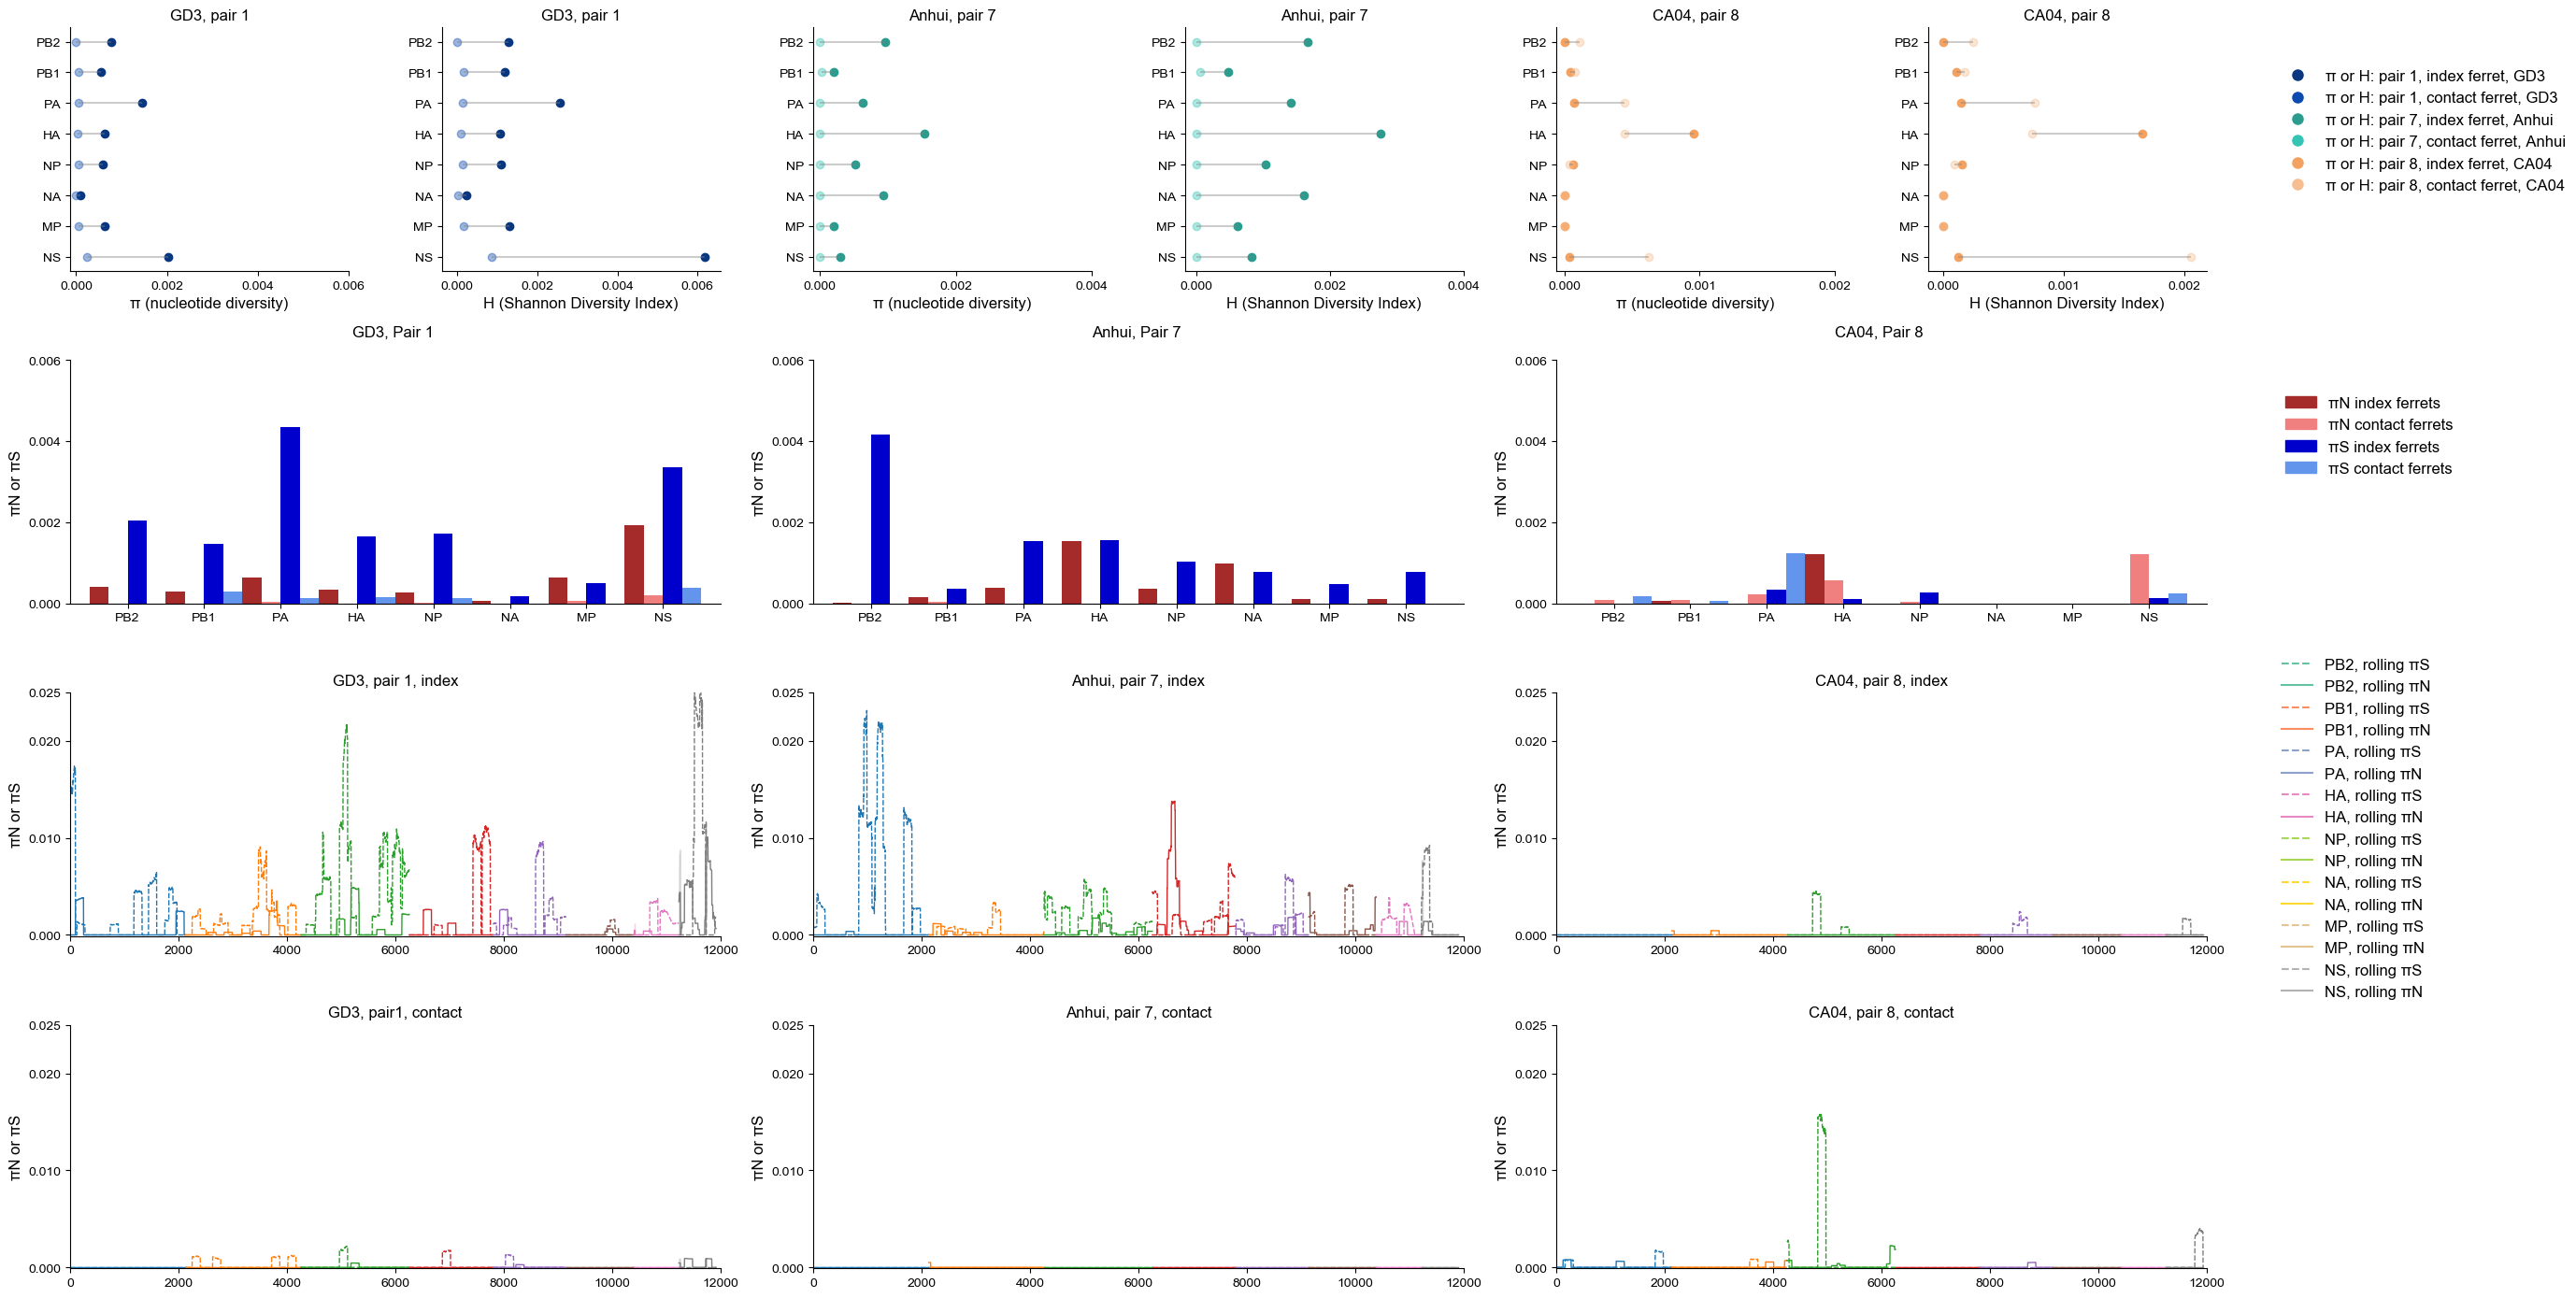

In [949]:
pd.options.mode.chained_assignment = None  # default='warn'
# define hex colors 
GD3 = '#08367F'
Anhui = '#2A9D8F'
CA04 = '#F4A261'

# generate a figure with sub-plots 
fig6 = plt.figure(figsize=(24,14), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4,18)

ax1 = fig6.add_subplot(gs[0, 0:3]) # pair1, π
ax2 = fig6.add_subplot(gs[0, 3:6]) # pair1, H
ax3 = fig6.add_subplot(gs[0, 6:9]) # pair7, π
ax4 = fig6.add_subplot(gs[0, 9:12]) # pair7, H
ax5 = fig6.add_subplot(gs[0, 12:15]) # pair8, π
ax6 = fig6.add_subplot(gs[0, 15:18]) # pair8, H

ax7 = fig6.add_subplot(gs[1, 0:6]) # pair1, πS and πN
ax8 = fig6.add_subplot(gs[1, 6:12]) # pair1, πS and πN
ax9 = fig6.add_subplot(gs[1, 12:18]) # pair7, πS and πN

ax10 = fig6.add_subplot(gs[2, 0:6]) # pair1, rolling πS and πN, index
ax11 = fig6.add_subplot(gs[3, 0:6]) # pair1, rolling πS and πN, contact
ax12 = fig6.add_subplot(gs[2, 6:12]) # pair7, rolling πS and πN, index
ax13 = fig6.add_subplot(gs[3, 6:12]) # pair1, rolling πS and πN, contact
ax14 = fig6.add_subplot(gs[2, 12:18]) # pair1, rolling πS and πN, index
ax15 = fig6.add_subplot(gs[3, 12:18]) # pair7, rolling πS and πN, contact

# get right of top and right frame of each subplot
axes = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

# Figure 6A
 
# Make the plot
ax1.set_title('GD3, pair 1', fontname='Arial', fontsize=12)
my_range1=range(1,len(pair1.index)+1)
ax1.invert_yaxis()
ax1.hlines(y=my_range1, xmin=pair1['π_index'], xmax=pair1['π_contact'], color='grey', alpha=0.4)
ax1.scatter(pair1['π_index'], my_range, color='#08367F', alpha=1, label='value1')
ax1.scatter(pair1['π_contact'], my_range, color='#0B4AAF', alpha=0.4 , label='value2')
ax1.set_yticks([1,2,3,4,5,6,7,8])
ax1.set_xticks([0, 0.002, 0.004, 0.006])
ax1.set_xlabel('π (nucleotide diversity)', fontname='Arial', fontsize=12)
ax1.set_yticklabels(['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS'])

ax2.set_title('GD3, pair 1', fontname='Arial', fontsize=12)
my_range2=range(1,len(pair1.index)+1)
ax2.invert_yaxis()
ax2.hlines(y=my_range2, xmin=pair1_H['H_index'], xmax=pair1_H['H_contact'], color='grey', alpha=0.4)
ax2.scatter(pair1_H['H_index'], my_range, color='#08367F', alpha=1, label='value1')
ax2.scatter(pair1_H['H_contact'], my_range, color='#0B4AAF', alpha=0.4 , label='value2')
ax2.set_yticks([1,2,3,4,5,6,7,8])
ax2.set_xticks([0, 0.002, 0.004, 0.006])
ax2.set_xlabel('H (Shannon Diversity Index)', fontname='Arial', fontsize=12)
ax2.set_yticklabels(['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS'])

my_range3=range(1,len(pair7.index)+1)
ax3.set_title('Anhui, pair 7', fontname='Arial', fontsize=12)
ax3.invert_yaxis()
ax3.hlines(y=my_range3, xmin=pair7['π_index'], xmax=pair7['π_contact'], color='grey', alpha=0.4)
ax3.scatter(pair7['π_index'], my_range, color='#2A9D8F', alpha=1, label='value1')
ax3.scatter(pair7['π_contact'], my_range, color='#35C5B4', alpha=0.4 , label='value2')
ax3.set_yticks([1,2,3,4,5,6,7,8])
ax3.set_xticks([0, 0.002, 0.004])
ax3.set_xlabel('π (nucleotide diversity)', fontname='Arial', fontsize=12)
ax3.set_yticklabels(['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS'])

ax4.set_title('Anhui, pair 7', fontname='Arial', fontsize=12)
my_range4=range(1,len(pair7_H.index)+1)
ax4.invert_yaxis()
ax4.hlines(y=my_range4, xmin=pair7_H['H_index'], xmax=pair7_H['H_contact'], color='grey', alpha=0.4)
ax4.scatter(pair7_H['H_index'], my_range, color='#2A9D8F', alpha=1, label='value1')
ax4.scatter(pair7_H['H_contact'], my_range, color='#35C5B4', alpha=0.4 , label='value2')
ax4.set_yticks([1,2,3,4,5,6,7,8])
ax4.set_xticks([0, 0.002, 0.004])
ax4.set_xlabel('H (Shannon Diversity Index)', fontname='Arial', fontsize=12)
ax4.set_yticklabels(['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS'])

my_range5=range(1,len(pair8.index)+1)
ax5.set_title('CA04, pair 8', fontname='Arial', fontsize=12)
ax5.invert_yaxis()
ax5.hlines(y=my_range5, xmin=pair8['π_index'], xmax=pair8['π_contact'], color='grey', alpha=0.4)
ax5.scatter(pair8['π_index'], my_range, color='#F4A261', alpha=1, label='value1')
ax5.scatter(pair8['π_contact'], my_range, color='#F7BE91', alpha=0.4 , label='value2')
ax5.set_yticks([1,2,3,4,5,6,7,8])
ax5.set_xticks([0, 0.001, 0.002])
ax5.set_xlabel('π (nucleotide diversity)', fontname='Arial', fontsize=12)
ax5.set_yticklabels(['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS'])

ax6.set_title('CA04, pair 8', fontname='Arial', fontsize=12)
my_range6=range(1,len(pair8_H.index)+1)
ax6.invert_yaxis()
ax6.hlines(y=my_range6, xmin=pair8_H['H_index'], xmax=pair8_H['H_contact'], color='grey', alpha=0.4)
ax6.scatter(pair8_H['H_index'], my_range, color='#F4A261', alpha=1, label='value1')
ax6.scatter(pair8_H['H_contact'], my_range, color='#F7BE91', alpha=0.4 , label='value2')
ax6.set_yticks([1,2,3,4,5,6,7,8])
ax6.set_xticks([0, 0.001, 0.002])
ax6.set_xlabel('H (Shannon Diversity Index)', fontname='Arial', fontsize=12)
ax6.set_yticklabels(['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS'])

# Make Figure 6B 

# create a color palette 
color_dict = ('brown', 'lightcoral', 'mediumblue', 'cornflowerblue')

# ax7
pair1_B.plot(x="gene", y=["πN_index", "πN_contact", "πS_index", "πS_contact"], kind="bar", color=color_dict, width=1.0, ax=ax7, legend=False)
ax7.set_title("GD3, Pair 1 \n", fontsize=12)
ax7.set_xlabel("gene", fontsize=12)
ax7.set_ylabel("πN or πS", fontsize=12)
ax7.set_ylim([0, 0.006])
ax7.set_yticks([0, 0.002, 0.004, 0.006])
ax7.set_xlabel('')
ax7.set_xticklabels(['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS'], rotation=0)

# ax8 
pair7_B.plot(x="gene", y=["πN_index", "πN_contact", "πS_index", "πS_contact"], kind="bar", color=color_dict, width=1.0, ax=ax8, legend=False)
ax8.set_title("Anhui, Pair 7 \n", fontsize=12)
ax8.set_xlabel("gene", fontsize=12)
ax8.set_ylabel("πN or πS", fontsize=12)
ax8.set_ylim([0, 0.006])
ax8.set_yticks([0, 0.002, 0.004, 0.006])
ax8.set_xlabel('')
ax8.set_xticklabels(['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS'], rotation=0)

# ax9 
pair8_B.plot(x="gene", y=["πN_index", "πN_contact", "πS_index", "πS_contact"], kind="bar", color=color_dict, width=1.0, ax=ax9, legend=False)
ax9.set_title("CA04, Pair 8 \n", fontsize=12)
ax9.set_xlabel("gene", fontsize=12)
ax9.set_ylabel("πN or πS", fontsize=12)
ax9.set_ylim([0, 0.006])
ax9.set_yticks([0, 0.002, 0.004, 0.006])
ax9.set_xlabel('')
ax9.set_xticklabels(['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS'], rotation=0)

# Make Figure 6C

sns.lineplot(x='x', y='y', hue='gene', style='style', linewidth=1, data=pair1_rolling_index, legend=False, ax=ax10)
ax10.set_title("GD3, pair 1, index", fontsize=12)
ax10.set_ylabel("πN or πS", fontsize=12)
ax10.set_ylim([-0.0001, 0.025])
ax10.set_yticks([0, 0.01, 0.02, 0.025])
ax10.set_xlim([0, 12000])
ax10.set_xlabel('')

sns.lineplot(x='x', y='y', hue='gene', style='style', linewidth=1, data=pair1_rolling_contact, legend=False, ax=ax11)
ax11.set_title("GD3, pair1, contact", fontsize=12)
ax11.set_ylabel("πN or πS", fontsize=12)
ax11.set_ylim([-0.0001, 0.025])
ax11.set_yticks([0, 0.01, 0.02, 0.025])
ax11.set_xlim([0, 12000])
ax11.set_xlabel('')

sns.lineplot(x='x', y='y', hue='gene', style='style', linewidth=1, data=pair7_rolling_index, legend=False, ax=ax12)
ax12.set_title("Anhui, pair 7, index", fontsize=12)
ax12.set_ylabel("πN or πS", fontsize=12)
ax12.set_ylim([-0.0001, 0.025])
ax12.set_yticks([0, 0.01, 0.02, 0.025])
ax12.set_xlim([0, 12000])
ax12.set_xlabel('')

sns.lineplot(x='x', y='y', hue='gene', style='style', linewidth=1, data=pair7_rolling_contact, legend=False, ax=ax13)
ax13.set_title("Anhui, pair 7, contact", fontsize=12)
ax13.set_ylabel("πN or πS", fontsize=12)
ax13.set_ylim([-0.0001, 0.025])
ax13.set_yticks([0, 0.01, 0.02, 0.025])
ax13.set_xlim([0, 12000])
ax13.set_xlabel('')

sns.lineplot(x='x', y='y', hue='gene', style='style', linewidth=1, data=pair8_rolling_index, legend=False, ax=ax14)
ax14.set_title("CA04, pair 8, index", fontsize=12)
ax14.set_ylabel("πN or πS", fontsize=12)
ax14.set_ylim([-0.0001, 0.025])
ax14.set_yticks([0, 0.01, 0.02, 0.025])
ax14.set_xlim([0, 12000])
ax14.set_xlabel('')

sns.lineplot(x='x', y='y', hue='gene', style='style', linewidth=1, data=pair8_rolling_contact, legend=False, ax=ax15)
ax15.set_title("CA04, pair 8, contact", fontsize=12)
ax15.set_ylabel("πN or πS", fontsize=12)
ax15.set_ylim([-0.0001, 0.025])
ax15.set_yticks([0, 0.01, 0.02, 0.025])
ax15.set_xlim([0, 12000])
ax15.set_xlabel('')

# add a legend to this plot
GD3_index = mlines.Line2D([], [], marker='o', color='#08367F', linestyle='None', markersize=8, label='π or H: pair 1, index ferret, GD3')
GD3_contact = mlines.Line2D([], [], marker='o', color='#0B4AAF', linestyle='None', markersize=8, label='π or H: pair 1, contact ferret, GD3')
Anhui_index = mlines.Line2D([], [], marker='o', color='#2A9D8F', linestyle='None', markersize=8, label='π or H: pair 7, index ferret, Anhui')
Anhui_contact = mlines.Line2D([], [], marker='o', color='#35C5B4', linestyle='None', markersize=8, label='π or H: pair 7, contact ferret, Anhui')
CA04_index = mlines.Line2D([], [], marker='o', color='#F4A261', linestyle='None', markersize=8, label='π or H: pair 8, index ferret, CA04')
CA04_contact = mlines.Line2D([], [], marker='o', color='#F7BE91', linestyle='None', markersize=8, label='π or H: pair 8, contact ferret, CA04')
πN_index = mpatches.Patch(color='brown', label='πN index ferrets')
πN_contact = mpatches.Patch(color='lightcoral', label='πN contact ferrets')
πS_index = mpatches.Patch(color='mediumblue', label='πS index ferrets')
πS_contact = mpatches.Patch(color='cornflowerblue', label='πS contact ferrets')
PB2_syn = mlines.Line2D([], [], color='#66c2a5', linestyle='dashed', markersize=8, label='PB2, rolling πS')
PB2_nonsyn = mlines.Line2D([], [], color='#66c2a5', markersize=8, label='PB2, rolling πN')
PB1_syn = mlines.Line2D([], [], color='#fc8d62', linestyle='dashed', markersize=8, label='PB1, rolling πS')
PB1_nonsyn = mlines.Line2D([], [], color='#fc8d62', markersize=8, label='PB1, rolling πN')
PA_syn = mlines.Line2D([], [], color='#8da0cb', linestyle='dashed', markersize=8, label='PA, rolling πS')
PA_nonsyn = mlines.Line2D([], [], color='#8da0cb', markersize=8, label='PA, rolling πN')
HA_syn = mlines.Line2D([], [], color='#e78ac3', linestyle='dashed', markersize=8, label='HA, rolling πS')
HA_nonsyn = mlines.Line2D([], [], color='#e78ac3', markersize=8, label='HA, rolling πN')
NP_syn = mlines.Line2D([], [], color='#a6d854', linestyle='dashed', markersize=8, label='NP, rolling πS')
NP_nonsyn = mlines.Line2D([], [], color='#a6d854', markersize=8, label='NP, rolling πN')
NA_syn = mlines.Line2D([], [], color='#ffd92f', linestyle='dashed', markersize=8, label='NA, rolling πS')
NA_nonsyn = mlines.Line2D([], [], color='#ffd92f', markersize=8, label='NA, rolling πN')
MP_syn = mlines.Line2D([], [], color='#e5c494', linestyle='dashed', markersize=8, label='MP, rolling πS')
MP_nonsyn = mlines.Line2D([], [], color='#e5c494', markersize=8, label='MP, rolling πN')
NS_syn = mlines.Line2D([], [], color='#b3b3b3', linestyle='dashed', markersize=8, label='NS, rolling πS')
NS_nonsyn = mlines.Line2D([], [], color='#b3b3b3', markersize=8, label='NS, rolling πN')

fig6.legend(handles=[GD3_index, GD3_contact, Anhui_index, Anhui_contact, CA04_index, CA04_contact], frameon=False, fontsize=12, bbox_to_anchor=(1.15,0.95))
fig6.legend(handles=[πN_index, πN_contact, πS_index, πS_contact], frameon=False, fontsize=12, bbox_to_anchor=(1.1,0.7))
fig6.legend(handles=[PB2_syn, PB2_nonsyn, PB1_syn, PB1_nonsyn, PA_syn, PA_nonsyn, HA_syn, HA_nonsyn, NP_syn, NP_nonsyn, NA_syn, NA_nonsyn, MP_syn, MP_nonsyn, NS_syn, NS_nonsyn], frameon=False, fontsize=12, bbox_to_anchor=(1.09,0.5))

# use tight_layout to optimize spacing of axes and titles within each subplot
fig6.tight_layout()
fig6.show()

# save this plot to the figures folder 
fig6.savefig("../figures/figure6.pdf", bbox_inches='tight', dpi=300)